In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

from mpm.hand import HandEnv
from tools import CN
from tools.config import merge_inputs

def get_default_cfg(cfg_path, sim_cfg=None):
    assert os.path.exists(cfg_path), "config file does not exist!"

    cfg = CN(new_allowed=True)
    cfg.env_name = Path(cfg_path).stem
    cfg.merge_from_file(cfg_path)

    if sim_cfg is not None:
        cfg.defrost()
        cfg.SIMULATOR = merge_inputs(cfg.SIMULATOR, **sim_cfg)
        cfg.freeze()

    return cfg


LOADING....
Loaded with 0.0008320808410644531 secs.
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:

from mpm import make

env = make(env_name='folding', sim_cfg={'max_steps': 4400})
init_state = env.init_state


{'h': 0.01, 'r': 0.16, 'init_pos': (0.5, 0.061875, 0.6), 'n_particles': 10000}
init renderer
GPU 0/8 memory: free=37.503, total=47.544


using object-centric view


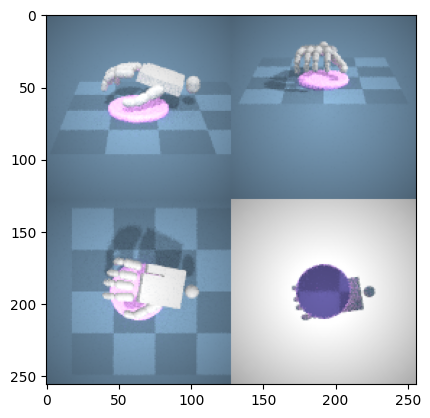

In [4]:
import matplotlib.pyplot as plt
from mpm.viewer import Viewer
vis = Viewer(env)
vis.refresh_views("obj_centric")
vis.set_view("side")
img = vis.render_state_multiview(spp=10, n_views=4)
plt.imshow(img)
plt.show()


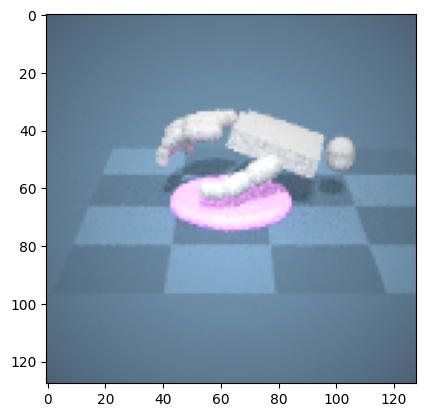

In [5]:
vis.set_view('side')
plt.imshow(vis.render())
plt.show()


In [6]:
import tqdm
import numpy as np
env.simulator.set_state(0, init_state)

n_hands = 1
act_dim = len(env.simulator.torch_action_scale)

def rand_action(n_hands=1):
    return np.random.random((n_hands, act_dim))

vis.set_view('side')

images = []
for i in tqdm.trange(100):
    action = rand_action(n_hands)

    env.simulator.step(action)
    images.append(vis.render())


100%|██████████| 100/100 [00:08<00:00, 11.52it/s]


In [7]:
from mpm.video_utils import write_video
write_video(images, filename="/home/sizheli/data/tmp1.gif") # TODO: set your output file name


animating /home/sizheli/project/self-model/data/tmp1.gif
MoviePy - Building file /home/sizheli/project/self-model/data/tmp1.gif with imageio.
